In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from os.path import dirname
import csv

In [2]:
datadir = os.getcwd()

suffix = ['1-20', '21-40', '41-60', '61-80', '81-100', '101-120', '121-140', '141-160', '161-180', '181-181']

datafile_input = []
for i in range(0 , len(suffix)):
    temp = '/ids_{0}.csv'.format(suffix[i])

    with open(datadir+temp, 'r') as f:
        reader = csv.reader(f)
        input_1_20 = list(reader)
    datafile_input.append(input_1_20)
    
datafile_output = []
for i in range(0 , len(suffix)):
    temp = '/{0}.csv'.format(suffix[i])

    with open(datadir+temp, 'r') as f:
        reader = csv.reader(f)
        output_1_20 = list(reader)
    datafile_output.append(output_1_20)   

In [3]:
#extract gaia source IDs from the input files
input_ids = []

for j in range(0, len(datafile_input)):
    input_idss = []
    for i in range(0, len(datafile_input[j])):
        input_idss.append(int(datafile_input[j][i][0].split(" ")[2]))
    input_ids.append(input_idss)

In [4]:
#extract gaia source IDs from the output files

output_ids = []

for j in range(0, len(datafile_output)):
    temp = [int(datafile_output[j][i][0]) for i in range(1,len(datafile_output[j]))]
    output_ids.append(temp)

In [5]:
#check if every pair of files (resp. first input and first output file) contain same IDs

for i in range(0, len(output_ids)):
    print(set(output_ids[i]) == set(input_ids[i]))

True
True
True
True
True
True
True
True
True
True


In [6]:
#now extract all data into lists

output_info = datafile_output[0][0]

In [7]:
output_all = []
for j in range(0, len(datafile_output)):
    #print(j)
    for i in range(0, len(datafile_output[j])-1):
        #print(i)
        temp = datafile_output[j][1:][i]
        output_all.append(temp)

In [8]:
len(output_all)

180

In [9]:
output_info

['source_id',
 'ra',
 'ra_error',
 'dec',
 'dec_error',
 'parallax',
 'parallax_error',
 'pmra',
 'pmra_error',
 'pmdec',
 'pmdec_error',
 'phot_g_mean_mag',
 'radial_velocity',
 'radial_velocity_error',
 'phot_variable_flag']

In [10]:
sid = np.array([int(output_all[i][0]) for i in range(0, len(output_all))])
ra = np.array([float(output_all[i][1]) for i in range(0, len(output_all))])
dec = np.array([float(output_all[i][3]) for i in range(0, len(output_all))])

magg = np.array([float(output_all[i][11]) for i in range(0, len(output_all))])
fluxg = 10**(-0.4*np.array(magg))

In [12]:
max(magg)

15.873859

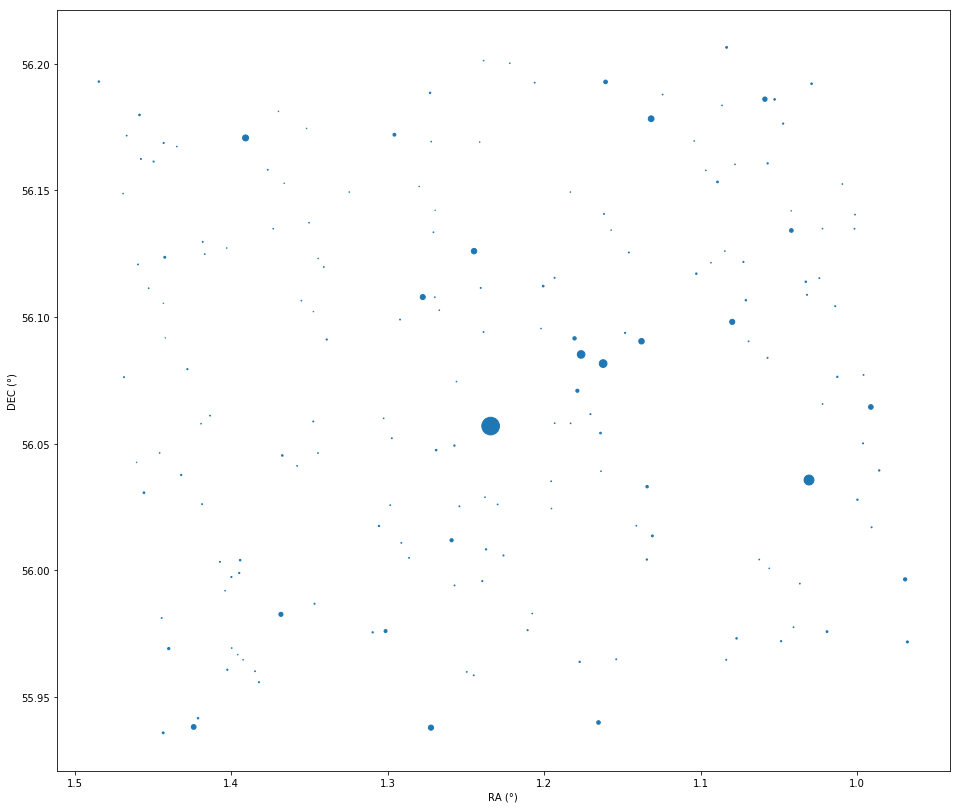

In [11]:
plt.subplots(1,1,figsize=(16,14))
plt.scatter(ra, dec, s=fluxg*5e5)

plt.gca().invert_xaxis()

plt.xlabel('RA (°)')
plt.ylabel('DEC (°)')

plt.show()

In [12]:
#because an (or some) elements in the following lists is not a number we cant convert it yet into floats... 
pax = np.asarray([output_all[i][5] for i in range(0, len(output_all))])
pmra = np.asarray([output_all[i][7] for i in range(0, len(output_all))])
pmdec = np.asarray([output_all[i][9] for i in range(0, len(output_all))])

In [13]:
pax

array(['0.5765312908091286', '0.0794960576433186', '1.8687878462390066',
       '0.26905402373400356', '1.9525910075305057', '0.1832773914533411',
       '0.149687850103253', '0.20681096166983523', '0.9089980790523472',
       '0.7336408004395342', '0.4725874810858686', '0.8072649983161586',
       '0.8382074961668238', '0.10218208199506569', '0.308865251480672',
       '0.10001309207987755', '0.17796616263098178', '2.025239955599143',
       '', '0.13208126039980903', '0.3661094225661081',
       '5.02444881054465', '0.13997833467953566', '0.1754240446711035',
       '0.22352692464379678', '0.8067248138068308', '0.6169652182115541',
       '0.5312189749712329', '1.8602879699830581', '0.2512561066010497',
       '0.5845151496646103', '16.093373595170252', '0.7736277572309439',
       '0.7335574035781018', '0.2980226378817957', '0.017934127129253054',
       '0.810102770242478', '0.8767904213287347', '0.15576598572668682',
       '0.34616800291429617', '0.68384067907586', '0.35262300134

In [14]:
'' in pax

True

In [15]:
for i in range(0, len(pax)):
    if pax[i] == '':
        print(i)    
    if pmra[i] == '':
        print(i)
    if pmdec[i] == '':
        print(i)
        
# star 133 resp. element 132 has no pax, pmra & pmdec!
# so the star will be removed from all lists

18
18
18
54
54
54


In [16]:
#remove element 132:

msk_lst = [18, 54]

sid_new = np.delete(sid, msk_lst)
ra_new = np.delete(ra, msk_lst)
dec_new = np.delete(dec, msk_lst)

magg_new = np.delete(magg, msk_lst)
fluxg_new = np.delete(fluxg, msk_lst)

pax_new = np.delete(pax, msk_lst).astype(float)
pmra_new = np.delete(pmra, msk_lst).astype(float)
pmdec_new = np.delete(pmdec, msk_lst).astype(float)

In [17]:
pax_new

array([ 0.57653129,  0.07949606,  1.86878785,  0.26905402,  1.95259101,
        0.18327739,  0.14968785,  0.20681096,  0.90899808,  0.7336408 ,
        0.47258748,  0.807265  ,  0.8382075 ,  0.10218208,  0.30886525,
        0.10001309,  0.17796616,  2.02523996,  0.13208126,  0.36610942,
        5.02444881,  0.13997833,  0.17542404,  0.22352692,  0.80672481,
        0.61696522,  0.53121897,  1.86028797,  0.25125611,  0.58451515,
       16.0933736 ,  0.77362776,  0.7335574 ,  0.29802264,  0.01793413,
        0.81010277,  0.87679042,  0.15576599,  0.346168  ,  0.68384068,
        0.352623  ,  1.25132085,  0.55514719,  2.2702918 ,  0.23257302,
        0.53386951,  1.12158995,  0.39572007,  0.625726  ,  0.21843284,
        0.52770786,  1.02806641,  0.34830204,  1.72752334,  0.40952572,
        1.52720403,  2.04915188,  0.80635046,  1.17804573,  0.08461181,
        0.47388478,  0.51339001,  0.75700314,  0.92863349,  0.28733475,
        0.94327808,  2.01584091,  0.66128335,  3.20335018,  0.29

In [18]:
def arrows(x, y, pm_x, pm_y, scale):
    temp = []
    for i in range(0, len(x)):
        temp2 = [x[i], y[i], scale * pm_x[i], scale * pm_y[i]]
        temp.append(temp2)
    return np.array(temp)

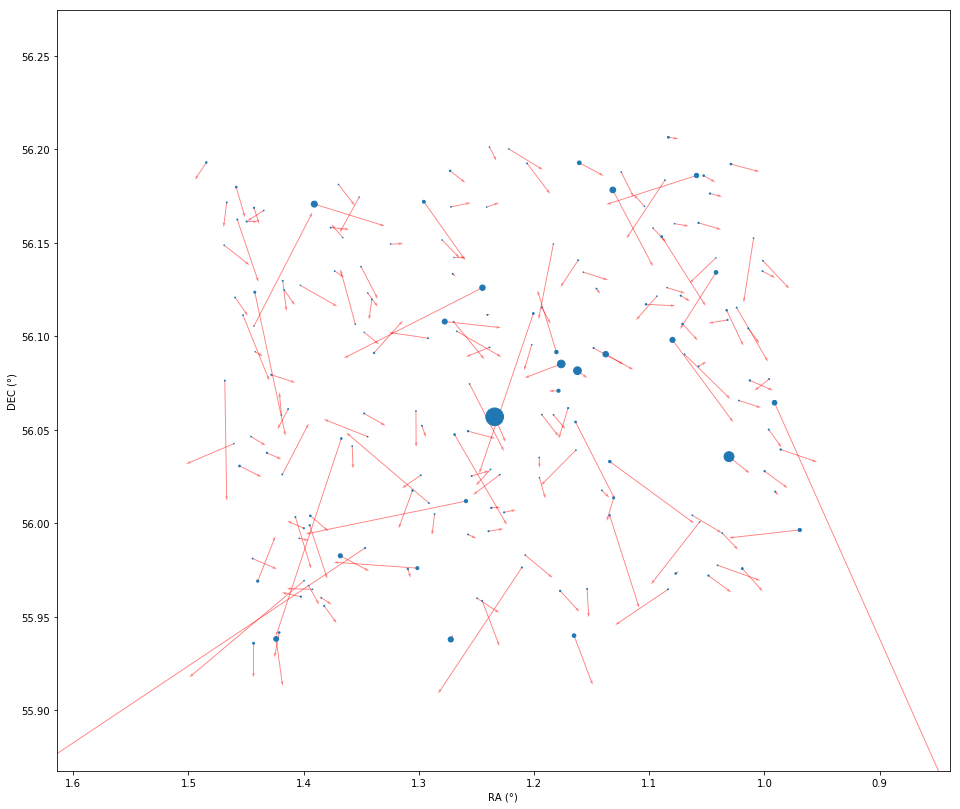

In [19]:
soa = arrows(ra_new, dec_new, pmra_new, pmdec_new, 0.005)


X, Y, U, V = zip(*soa)
plt.subplots(1,1,figsize=(16,14))
ax = plt.gca()
ax.quiver(X, Y, U, V, angles='xy', scale_units='xy', scale=1, width=0.001, alpha=0.5, color='r')
ax.scatter(ra_new, dec_new, s=np.array(fluxg_new)*5e5)

ax.invert_xaxis()

ax.margins(0.25) 

ax.set_xlabel('RA (°)')
ax.set_ylabel('DEC (°)')

plt.draw()
plt.show()

In [20]:
# convert parallaxes into parsecs
parcs = 1000./np.array(pax_new)

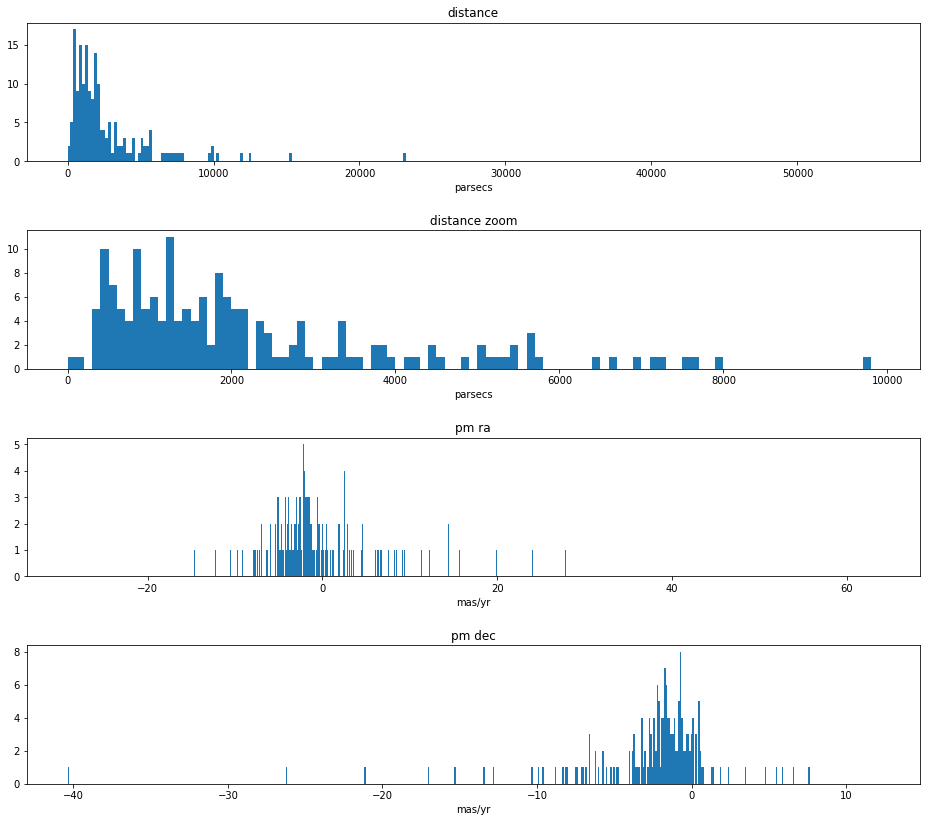

In [29]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(16,14))
bottom = 0.1
ax1.hist(parcs, bins=np.arange(0,max(parcs)+10,200))
ax2.hist(parcs, bins=np.arange(0,10000,100))
ax3.hist(pmra_new, bins=np.arange(min(pmra_new),max(pmra_new),0.1)) #
ax4.hist(pmdec_new, bins=np.arange(min(pmdec_new),max(pmdec_new),0.1)) #

ax1.set_title('distance')
ax2.set_title('distance zoom')
ax3.set_title('pm ra')
ax4.set_title('pm dec')

ax1.set_xlabel('parsecs')
ax2.set_xlabel('parsecs')
ax3.set_xlabel('mas/yr')
ax4.set_xlabel('mas/yr')

plt.subplots_adjust(hspace=0.5)

plt.show()

In [22]:
mask_dist = []
mask_pmra = []
mask_pmde = []

for i in range(len(parcs)):
    #mask_dist.append(400 <= parcs[i] <= 600)
    mask_dist.append(0 <= parcs[i] <= 3000)
    
for j in range(len(pmra_new)):
    #mask_pmra.append(-5 <= pmra_new[j] <= 5)
    mask_pmra.append(-10 <= pmra_new[j] <= 5)
    
for k in range(len(pmdec_new)):
    #mask_pmde.append(-10 <= pmdec_new[k] <= 0)
    mask_pmde.append(-6 <= pmdec_new[k] <= 3)
    
mask_dist = np.array(mask_dist)
mask_pmra = np.array(mask_pmra)
mask_pmde = np.array(mask_pmde)

mask_cluster = []

for ind in range(max(len(mask_dist),len(mask_pmra),len(mask_pmde))):
    if mask_dist[ind] and mask_pmra[ind] and mask_pmde[ind]:
        mask_cluster.append(True) 
    else:
        mask_cluster.append(False)
        
mask_cluster = np.array(mask_cluster)

In [23]:
mask_cluster

array([ True, False, False, False, False, False, False, False, False,
       False,  True, False,  True, False, False, False, False, False,
       False,  True,  True, False, False, False,  True,  True,  True,
       False, False,  True, False,  True,  True, False, False,  True,
        True, False,  True,  True,  True, False,  True, False, False,
        True,  True,  True,  True, False,  True,  True,  True, False,
        True, False, False,  True,  True, False,  True,  True,  True,
        True, False,  True, False,  True, False, False,  True,  True,
       False,  True, False, False,  True,  True, False,  True, False,
        True, False,  True, False,  True,  True, False,  True, False,
        True,  True,  True,  True, False,  True, False, False,  True,
       False, False, False, False, False,  True,  True, False,  True,
        True, False,  True, False,  True, False, False,  True, False,
       False, False, False,  True,  True,  True,  True, False, False,
       False, False,

In [24]:
ra_cl = ra_new[mask_cluster]
dec_cl =dec_new[mask_cluster]

pmra_new_cl = pmra_new[mask_cluster]
pmdec_new_cl = pmdec_new[mask_cluster]
parcs_cl = parcs[mask_cluster]

fluxg_cl = fluxg_new[mask_cluster]

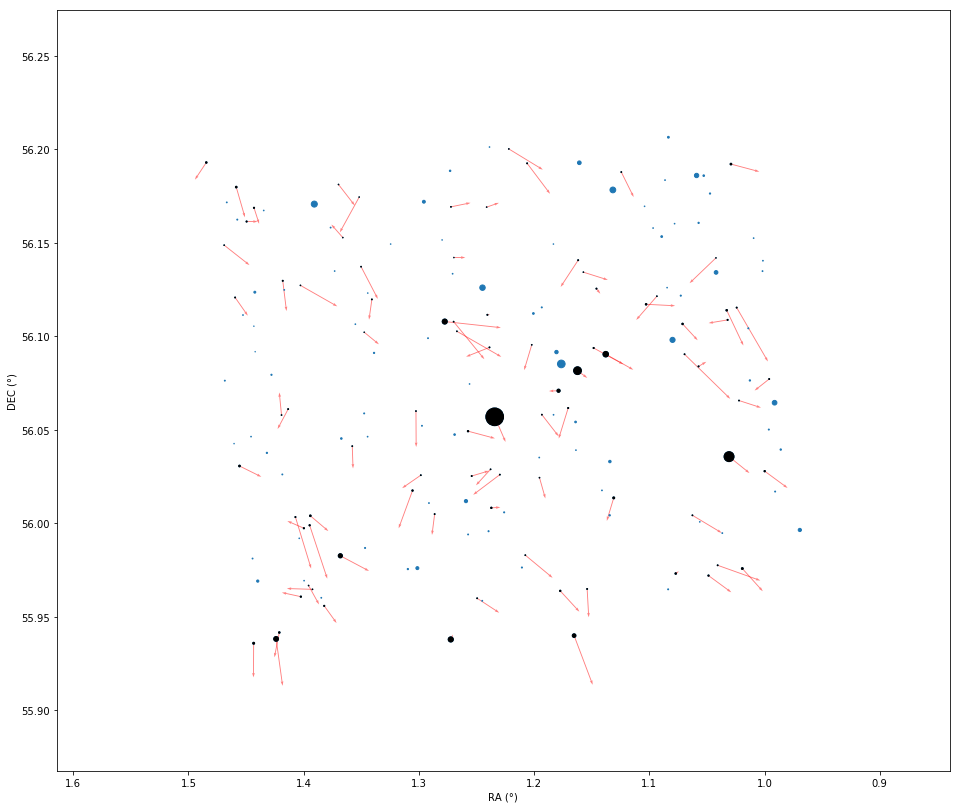

In [25]:
soa = arrows(ra_cl, dec_cl, pmra_new_cl, pmdec_new_cl, 0.005)

X, Y, U, V = zip(*soa)
plt.subplots(1,1,figsize=(16,14))
ax = plt.gca()
ax.quiver(X, Y, U, V, angles='xy', scale_units='xy', scale=1, width=0.001, alpha=0.5, color='r')
ax.scatter(ra_new, dec_new, s=np.array(fluxg_new)*5e5)
ax.scatter(ra_cl, dec_cl, s=np.array(fluxg_cl)*5e5,c='k')

ax.invert_xaxis()

ax.margins(0.25) 

ax.set_xlabel('RA (°)')
ax.set_ylabel('DEC (°)')

plt.draw()
plt.show()

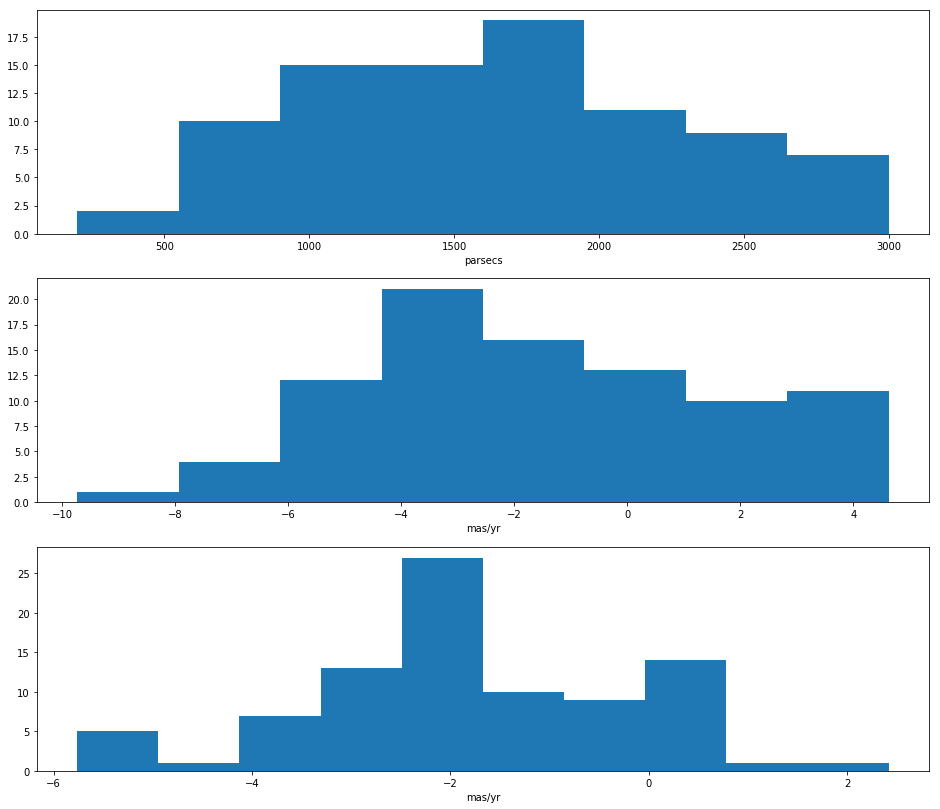

In [26]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(16,14))

_,bins, __ = ax1.hist(parcs_cl, bins='auto')#np.arange(400,600,20)
ax2.hist(pmra_new_cl, bins='auto') #np.arange(min(pmra_new_cl),max(pmra_new_cl),0.2)
ax3.hist(pmdec_new_cl, bins='auto') #np.arange(min(pmdec_new_cl),max(pmdec_new_cl),0.2)
ax1.set_xlabel('parsecs')
ax2.set_xlabel('mas/yr')
ax3.set_xlabel('mas/yr')
#plt.subplots_adjust(hspace=0.5)
plt.show()